### The data that is formated to work is from this website: https://www.finam.ru/quote/forex/eurusd/export/  
Your browser should have an option to translate it. See the picture below that shows the settings I use:

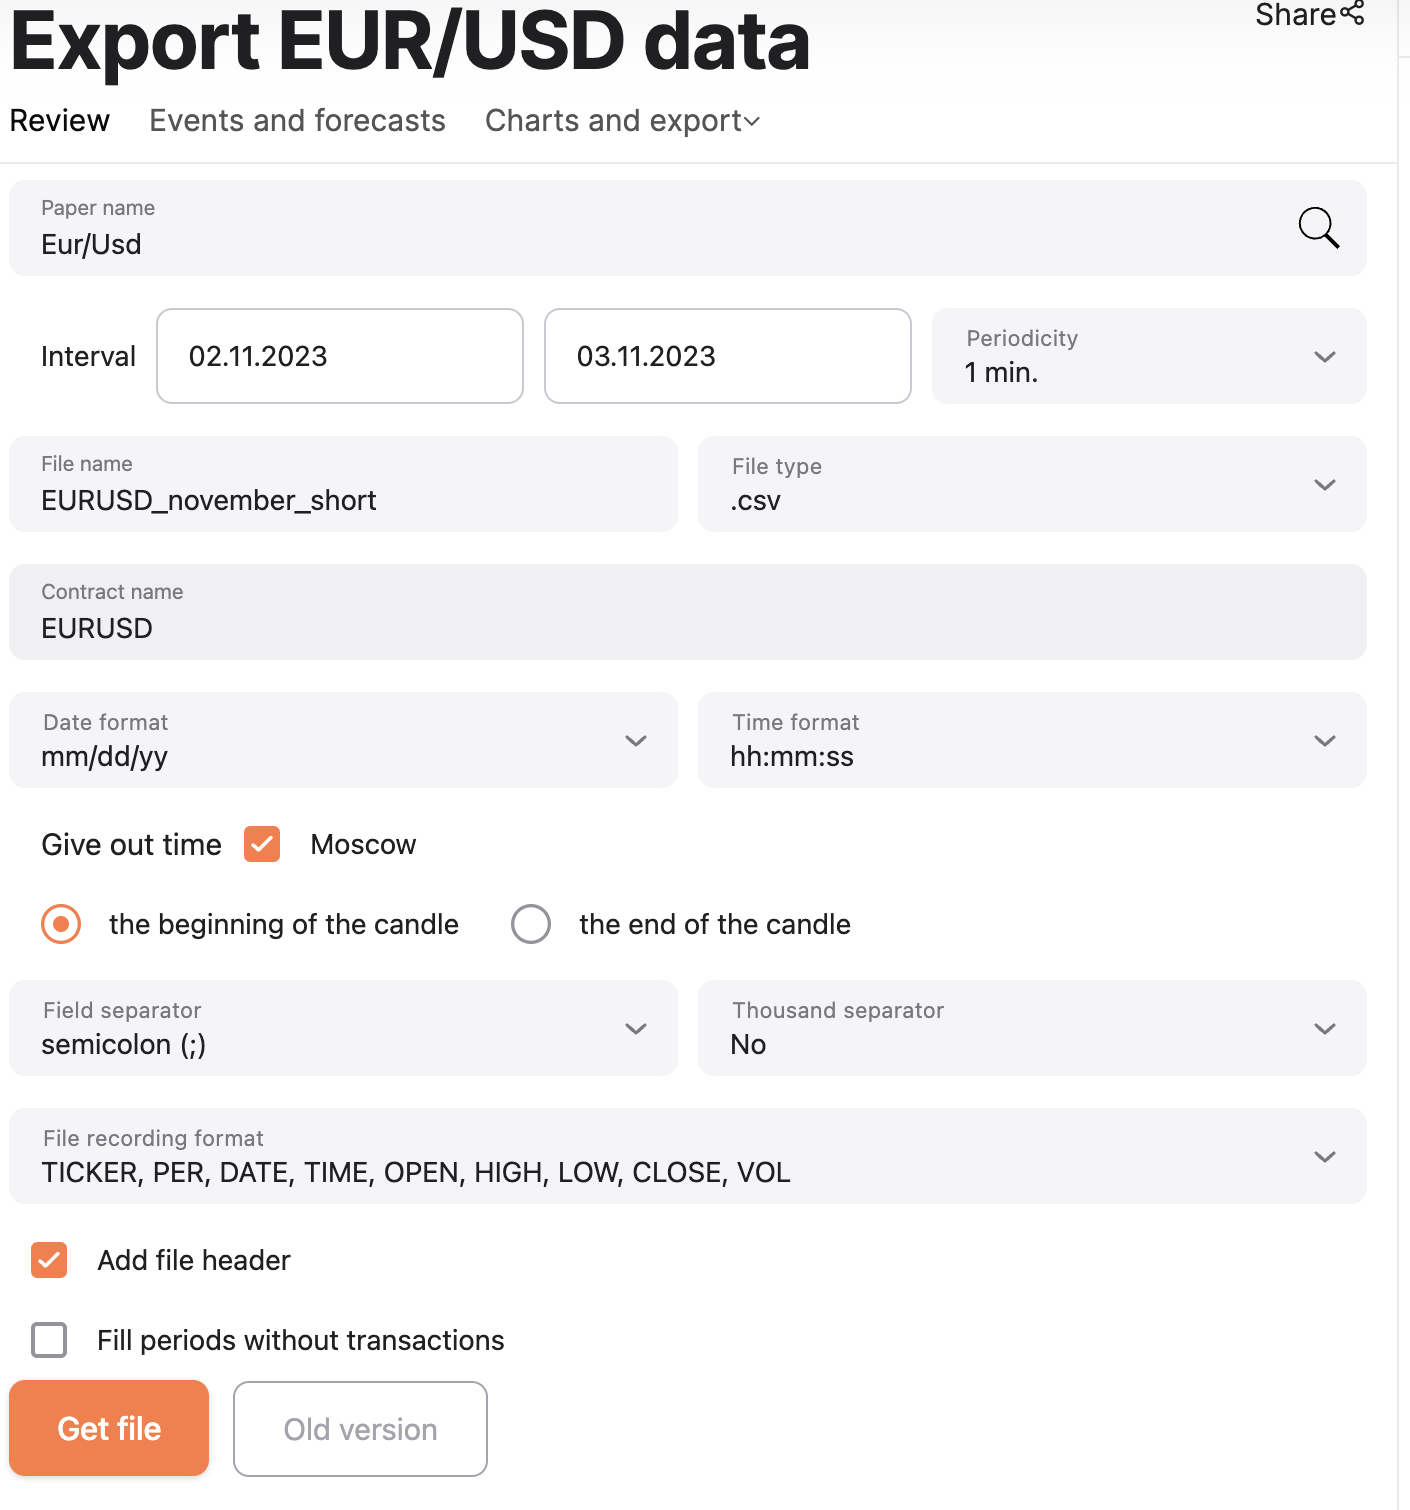

### This is an ugly script, it was origonaly multiple cells but this creates a dataset all in one. Just change the input and ouput directories.

In [ ]:
# Script to add SMA_50 and EMA_50 to the dataset and remove the 'TICKER' column

import pandas as pd
from stockstats import StockDataFrame

# Define the column names
columns = ['TICKER', 'PER', 'DATE', 'TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL']

# Read the CSV file, skip the first row (if it is a header), and set the column names
# Change 'skiprows=1' to 'skiprows=0' if the first row contains data
df = pd.read_csv('/Users/ronangrant/Downloads/EURUSD_november_short.csv', sep=';', header=None, skiprows=1, names=columns)

# Remove the 'TICKER' column
df.drop(['TICKER','PER'], axis=1, inplace=True)

# Convert 'DATE' and 'TIME' into a single datetime column with specified format
df['datetime'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'], format='%m/%d/%y %H:%M:%S')
df = df.set_index('datetime')

# Drop the original 'DATE' and 'TIME' columns as they are no longer needed
df.drop(['DATE', 'TIME'], axis=1, inplace=True)

# Convert the DataFrame to a StockDataFrame for calculation
stock_df = StockDataFrame.retype(df)

# Calculate SMA and EMA for 50 periods
df['SMA_50'] = stock_df['close_50_sma'].round(5)
df['EMA_50'] = stock_df['close_50_ema'].round(5)


# Display the first few rows of the updated DataFrame
print(df.head())

# Script to create a target column for binary options prediction

# Define the function to create the target variable
def create_target_variable(df, future_minutes):
    """
    Creates a target variable indicating if the price goes up or down in the specified future timeframe.
    1 indicates an increase, and 0 indicates a decrease or no change.
    """
    # Shift the closing price by the specified future minutes
    df['Future_Close'] = df['close'].shift(-future_minutes)

    # Determine if the future closing price is higher than the current closing price
    df['Target'] = (df['Future_Close'] > df['close']).astype(int)

    # Drop the last 'future_minutes' rows as they won't have a future price
    df.dropna(subset=['Future_Close'], inplace=True)

    # Optionally, drop the 'Future_Close' column if it's no longer needed
    df.drop(columns=['Future_Close'], inplace=True)

    return df

# Specify the future time frame for prediction (60 minutes)
future_minutes = 60

# Create the target column
df = create_target_variable(df, future_minutes)

# Display the first few rows of the updated DataFrame
print(df.head())

# Script to convert time zone of the DataFrame 'df' from MSK to ET

import pytz

# Assuming the current time zone is Moscow Time (MSK)
moscow_tz = pytz.timezone('Europe/Moscow')
df.index = df.index.tz_localize(moscow_tz)

# Convert to Eastern Time (ET)
et_tz = pytz.timezone('America/New_York')
df.index = df.index.tz_convert(et_tz)

# Display the first few rows of the updated DataFrame
print(df.head())

# Script to add RSI_14, MACD, MACD_Signal, SMA_20, Bollinger Bands, Day of Week, %K, %D, and ATR to the dataset

import pandas as pd
from stockstats import StockDataFrame

# Convert the DataFrame to a StockDataFrame for calculation
stock_df = StockDataFrame.retype(df)

# Calculate RSI for 14 periods
df['RSI_14'] = stock_df['rsi_14']

# Calculate MACD and MACD Signal
df['MACD'] = stock_df['macd']
df['MACD_Signal'] = stock_df['macds']

# Calculate SMA for 20 periods
df['SMA_20'] = stock_df['close_20_sma']

# Calculate Bollinger Bands
df['Bollinger_Upper'] = stock_df['boll_ub']
df['Bollinger_Lower'] = stock_df['boll_lb']

# Extract day of the week from the datetime index
df['day_of_week'] = df.index.dayofweek

# Calculate %K and %D for Stochastic Oscillator
df['%K'] = stock_df['kdjk']
df['%D'] = stock_df['kdjd']

# Calculate Average True Range (ATR)
df['ATR'] = stock_df['atr_14']

# Display the first few rows of the updated DataFrame
print(df.head())

# Script to round selected columns to different decimal places

# Rounding RSI_14, %K, %D to 2 decimal places
df[['RSI_14', '%K', '%D']] = df[['RSI_14', '%K', '%D']].round(3)

# Rounding MACD, MACD_Signal, ATR to 6 decimal places
df[['MACD', 'MACD_Signal', 'ATR']] = df[['MACD', 'MACD_Signal', 'ATR']].round(7)

# Rounding SMA_20, Bollinger_Upper, Bollinger_Lower to 5 decimal places
df[['SMA_20', 'Bollinger_Upper', 'Bollinger_Lower']] = df[['SMA_20', 'Bollinger_Upper', 'Bollinger_Lower']].round(5)

# Display the first few rows of the updated DataFrame
print(df.head())

# Script to clean the dataset by removing weekends, specific Fridays, NaN values, and specific dates

# Import necessary libraries
import pandas as pd

# Convert index to datetime if it's not already
df.index = pd.to_datetime(df.index)

# Remove Saturdays and Sundays
df = df[df.index.dayofweek < 5]

# Remove Fridays after 11 am
df = df[~((df.index.dayofweek == 4) & (df.index.hour >= 11))]

# Remove rows with any NaN or missing values
df = df.dropna()

# List of specific dates to remove
dates_to_remove = ["2023-12-25", "2023-11-16", "2023-10-31", "2022-12-08", 
                   "2023-03-29", "2023-05-17", "2023-07-11", "2023-08-02", 
                   "2023-01-16", "2023-02-20", "2023-04-07", "2023-05-29", 
                   "2023-06-19", "2023-07-04"]

# Convert the list to datetime for comparison
dates_to_remove = pd.to_datetime(dates_to_remove)

# Remove the specific dates
df = df[~df.index.normalize().isin(dates_to_remove)]

# Display the first few rows of the cleaned DataFrame
print(df.head())



# Script to remove rows where RSI_14 is 0

# Filter out rows where RSI_14 is 0
df = df[df['RSI_14'] != 0]

# Display the first few rows of the updated DataFrame
print(df.head())


# Script to save the DataFrame 'df' to a CSV file, including the datetime index

# Save the DataFrame as a CSV file
csv_file_path = '/Users/ronangrant/Downloads/EURUSD_november_short_in.csv'
df.to_csv(csv_file_path, index=True)  

### And then to test the dataset I use:

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def train_and_evaluate_model(file_path):
    print(f"Starting processing on {file_path}")

    # Load the dataset
    df = pd.read_csv(file_path)

    # Convert 'datetime' from index to hour and minute, then drop the original 'datetime' column
    df['datetime'] = pd.to_datetime(df['datetime'], utc=True)
    df['hour'] = df['datetime'].dt.hour
    df['minute'] = df['datetime'].dt.minute
    df.drop('datetime', axis=1, inplace=True)

    # Define features and target
    X = df.drop('Target', axis=1)
    y = df['Target']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

# File path for the dataset
dataset_path = '/Users/ronangrant/Downloads/dataset_stockstat.csv'  # Replace with your CSV file path

# Train the model and evaluate its performance
train_and_evaluate_model(dataset_path)
